# Ligand Scoring and Ranking

This notebook loads docking results from `ligand_scoring.csv` and visualizes:
- Best docking score per ligand
- Ligand efficiency (score per heavy atom)

It assumes you have already run:

```bash
python alphafold_target_pipeline/src/ligand_scoring.py
```


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Adjust path if needed if you move this notebook
csv_path = "../output/ligand_scoring.csv"
df = pd.read_csv(csv_path)
df

,ligand_file,ligand_name,ligand_core,num_poses,best_score,worst_score,mean_score,heavy_atoms,ligand_efficiency
0,alphafold_target_pipeline\output\docking\trime...,trimethoprim_out,trimethoprim,9,-7.832,-6.978,-7.334111,20,-0.391600
1,alphafold_target_pipeline\output\docking\pyrim...,pyrimethamine_out,pyrimethamine,9,-7.438,-6.418,-6.876222,17,-0.437529
2,alphafold_target_pipeline\output\docking\fragm...,fragment_core_out,fragment_core,9,-4.808,-4.518,-4.653444,8,-0.601000


In [2]:
# Sort ligands by best docking score (more negative = better)
df_sorted = df.sort_values(by="best_score", ascending=True)
df_sorted

,ligand_file,ligand_name,ligand_core,num_poses,best_score,worst_score,mean_score,heavy_atoms,ligand_efficiency
0,alphafold_target_pipeline\output\docking\trime...,trimethoprim_out,trimethoprim,9,-7.832,-6.978,-7.334111,20,-0.391600
1,alphafold_target_pipeline\output\docking\pyrim...,pyrimethamine_out,pyrimethamine,9,-7.438,-6.418,-6.876222,17,-0.437529
2,alphafold_target_pipeline\output\docking\fragm...,fragment_core_out,fragment_core,9,-4.808,-4.518,-4.653444,8,-0.601000


## Best Docking Score per Ligand

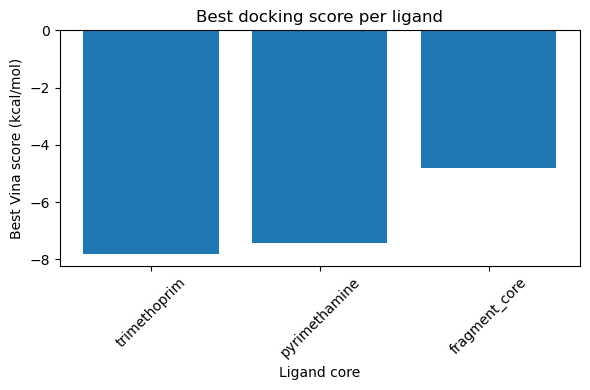

In [3]:
plt.figure(figsize=(6, 4))
plt.bar(df_sorted["ligand_core"], df_sorted["best_score"])
plt.xlabel("Ligand core")
plt.ylabel("Best Vina score (kcal/mol)")
plt.title("Best docking score per ligand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ligand Efficiency (Score per Heavy Atom)

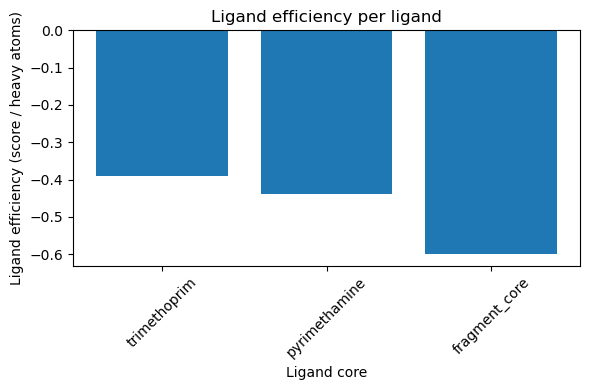

In [4]:
plt.figure(figsize=(6, 4))
plt.bar(df_sorted["ligand_core"], df_sorted["ligand_efficiency"])
plt.xlabel("Ligand core")
plt.ylabel("Ligand efficiency (score / heavy atoms)")
plt.title("Ligand efficiency per ligand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Notes

- More negative docking scores indicate stronger predicted binding.
- Ligand efficiency normalizes by size (heavy atom count),
  which can highlight small but efficient fragments.


In [5]:
df_sorted[["ligand_core", "best_score", "ligand_efficiency"]]


,ligand_core,best_score,ligand_efficiency
0,trimethoprim,-7.832,-0.391600
1,pyrimethamine,-7.438,-0.437529
2,fragment_core,-4.808,-0.601000
